<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_Unsupervised_Learning_Partitional_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept

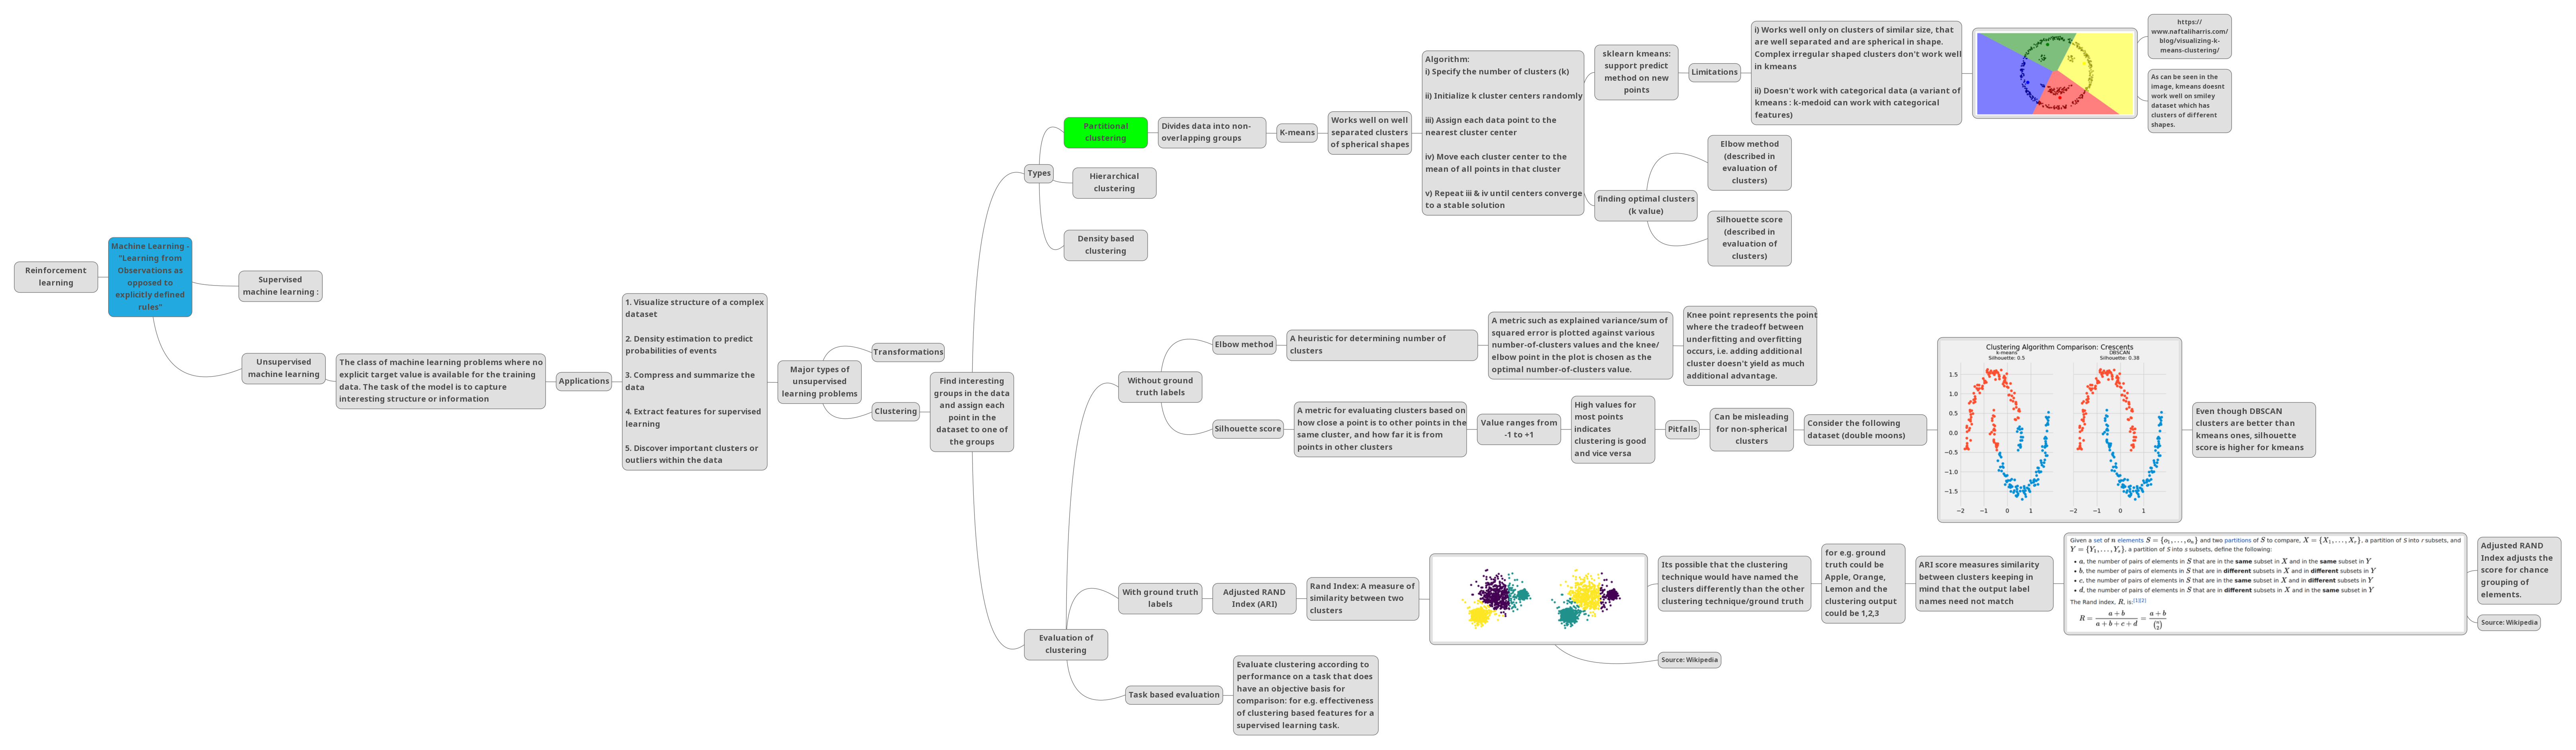

* On the kind of data where kmeans doesn't work well

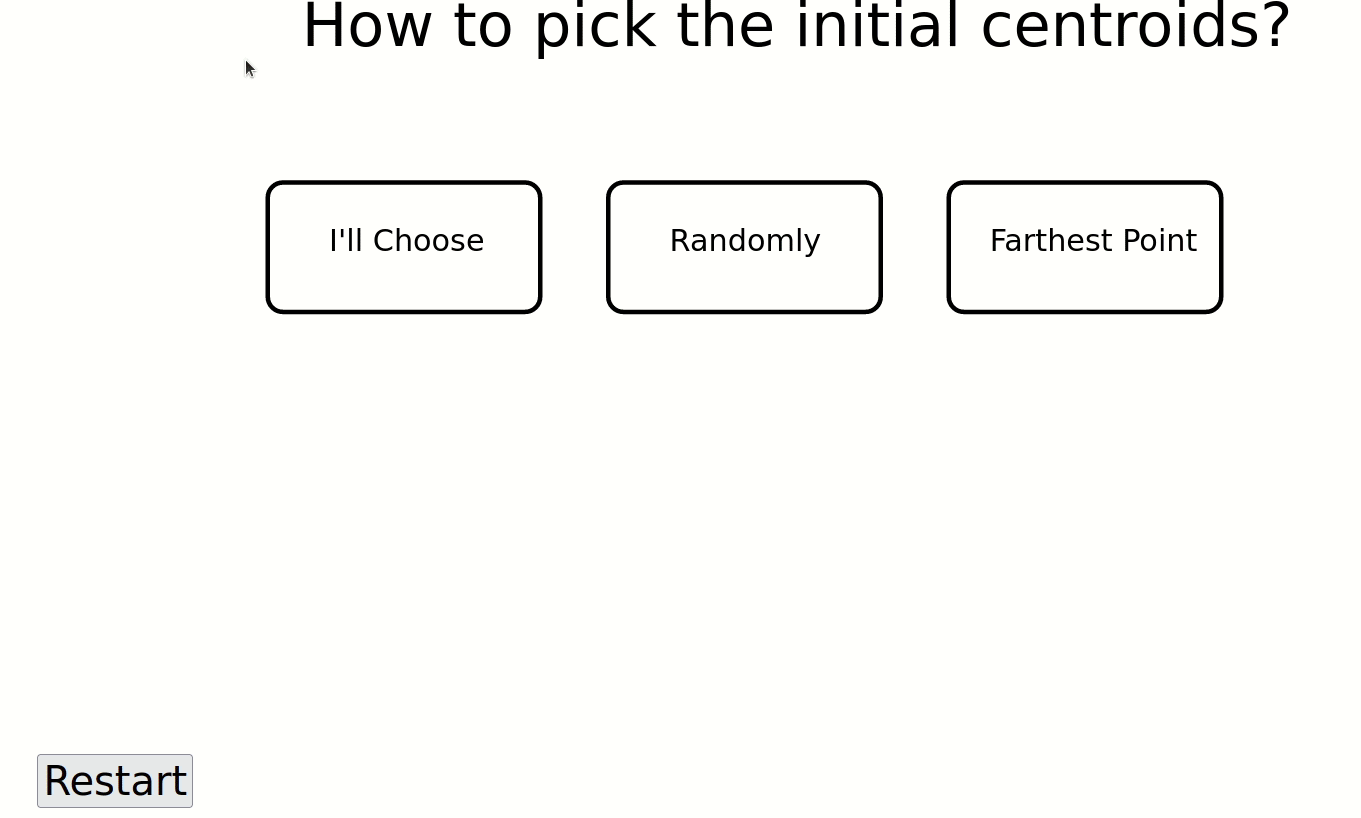

# Setup

In [125]:
%matplotlib inline

In [126]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer,make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,adjusted_rand_score
import seaborn as sns

from statistics import mode

In [127]:
np.set_printoptions(2)

# Case studies

## k-means clustering

### Synthetic dataset

In [128]:
# X_kmeans,y_kmeans = make_blobs(n_samples=100,
#            centers=3,
#            cluster_std = 1,
#            random_state=0)

X_synth,y_synth = make_blobs(
           random_state=10)

Text(0.5, 1.0, 'Synthetic dataset for kmeans clustering')

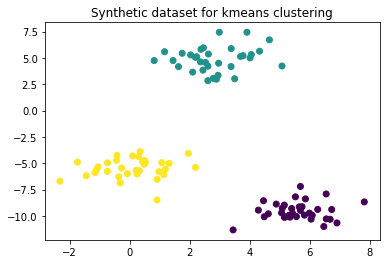

In [129]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)
plt.title('Synthetic dataset for kmeans clustering')

In [130]:
kmeans = KMeans(n_clusters=3)

In [131]:
kmeans.fit(X_synth)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [132]:
kmeans.cluster_centers_

array([[ 2.84,  4.86],
       [ 5.62, -9.54],
       [ 0.09, -5.46]])

Text(0.5, 1.0, 'kmeans clusters on the synthetic dataset')

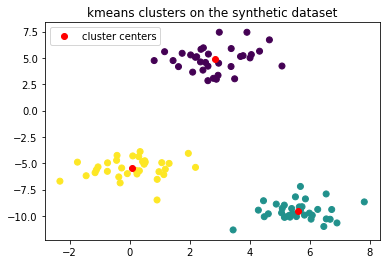

In [133]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro',label = 'cluster centers')
plt.legend()
plt.title('kmeans clusters on the synthetic dataset')

* kmeans has perfectly identified the clusters. 

In [134]:
kmeans.inertia_ #SSE 

186.36588620101443

#### Finding optimal k value

#####  Elbow method (Visual)

In [157]:
sse = []
for k_itn in range(1,11):
  kmeansitn = KMeans(n_clusters=k_itn)
  kmeansitn.fit(X_synth)
  sse.append(kmeansitn.inertia_)

Text(0, 0.5, 'SSE (Sum of squared error)')

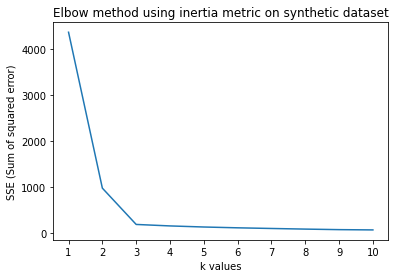

In [158]:
plt.plot(range(1,11),sse)
plt.title('Elbow method using inertia metric on synthetic dataset')
plt.xlabel('k values')
plt.xticks(range(1,11))
plt.ylabel('SSE (Sum of squared error)')

* We can see that k=3 is the elbow point in the graph => post k=3 there is flattening of the SSE curve. 


##### Elbow method (function: kneed -> KneeLocator)

If finding k visually is not straightforward, then it can be additionally validated from KneeLocator function from kneed package. 

In [159]:
!pip install kneed

In [160]:
from kneed import KneeLocator

In [161]:
kval = KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')

* Curve and direction attribute specification is important. Otherwise it yields different answers based on the default settings. 

In [162]:
kval.elbow

3

##### Silhouette score

* Another technique to find optimal k: Silhouette score 

* Measures "goodness" of a point based on:
  * How close it is to points in the same cluster
  * How separated it is from points in the other clusters

* Silhouette score gives a value between [-1,1], with higher values indicating better clustering according to the criteria mentioned above. 


In [163]:
from sklearn.metrics import silhouette_score

In [164]:
silhouette = []
for k_itn in range(2,11):
  kmeansitn = KMeans(n_clusters=k_itn)
  kmeansitn.fit(X_synth)
  silhouette.append(silhouette_score(X_synth,kmeansitn.labels_))

Text(0, 0.5, 'silhouette score')

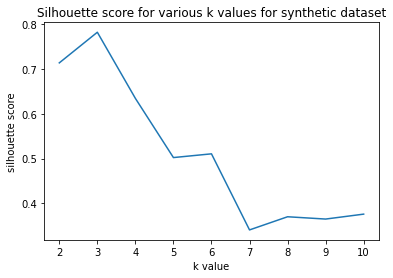

In [165]:
plt.plot(range(2,11),silhouette)
plt.title('Silhouette score for various k values for synthetic dataset')
plt.xticks(range(2,11))
plt.xlabel('k value')
plt.ylabel('silhouette score')

* Here also k=3 has highest silhouette score. 

### Iris dataset

In [166]:
from sklearn.datasets import load_iris

In [167]:
X_Iris,y_Iris = load_iris(return_X_y=True)

In [178]:
scaler = StandardScaler()
X_Iris_scaled = scaler.fit_transform(X_Iris)

#### Predefined clusters

In [169]:
Iris_kmeans_3cl = KMeans(n_clusters=3,random_state=0)

In [170]:
Iris_kmeans_3cl.fit(X_Iris_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

##### Clustering Accuracy

In [171]:
mode(Iris_kmeans_3cl.predict(X_Iris_scaled[y_Iris == 0]))

1

In [172]:
mode(Iris_kmeans_3cl.predict(X_Iris_scaled[y_Iris == 1]))

2

In [173]:
mode(Iris_kmeans_3cl.predict(X_Iris_scaled[y_Iris == 2]))

0

In [174]:
labels = np.zeros_like(y_Iris)
for clusterindex in range(3):
  labels[Iris_kmeans_3cl.labels_ == clusterindex] = mode(y_Iris[Iris_kmeans_3cl.labels_ == clusterindex])

In [175]:
confusion_matrix(y_Iris,labels)

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]])

In [176]:
print("Accuracy score = {:.2f}".format(accuracy_score(y_Iris,labels)))

Accuracy score = 0.83


In [206]:
print("ARI Iris = {:.2f}".format(adjusted_rand_score(y_Iris,
                                                     Iris_kmeans_3cl.predict(X_Iris_scaled))))

ARI Iris = 0.62


#### Choosing clusters through elbow method

In [207]:
Iris_sse = []
for k_itn in range(1,6):
  kmeansitn = KMeans(n_clusters=k_itn)
  kmeansitn.fit(X_Iris_scaled)
  Iris_sse.append(kmeansitn.inertia_)

Text(0.5, 1.0, 'KMeans on Iris')

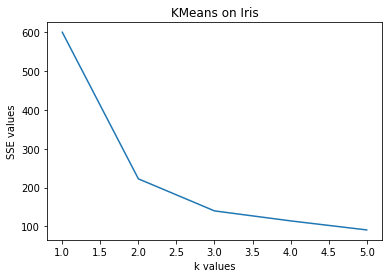

In [208]:
plt.plot(range(1,6),Iris_sse)
plt.xlabel('k values')
plt.ylabel('SSE values')
plt.title('KMeans on Iris')

* 2 & 3 both are good values. 

In [209]:
kneeiris = KneeLocator(range(1,6),Iris_sse,curve='convex',direction='decreasing')

In [210]:
kneeiris.elbow

2

* Interesting output. Kmeans is finding 2 clusters as the optimal grouping for the dataset.

* Had we not known the true labels, we would have gone with the value the function gave us. 

* On the other hand, if we had a threshold for SSE value or amount of variance explained, then we would go with the minimum cluster number which qualifies those. 

* Overall, if we know the number of clusters, then in the Iris dataset kmeans is doing a good job of putting the data in the 3 clusters (~83% accuracy)

### Digits Dataset

* Good reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [179]:
from sklearn.datasets import load_digits

In [180]:
X_digits,y_digits = load_digits(return_X_y=True)

In [181]:
X_digits.shape

(1797, 64)

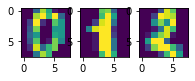

In [182]:
plt.figure(figsize = (3,1))
plt.subplot(1,3,1)
plt.imshow(X_digits[0].reshape(8,8))
plt.subplot(1,3,2)
plt.imshow(X_digits[1].reshape(8,8))
plt.subplot(1,3,3)
plt.imshow(X_digits[2].reshape(8,8))

In [183]:
X_digits_scaled = X_digits/255.0

#### Predefined clusters

In [184]:
kmeansdigits_predef_clusters = KMeans(n_clusters=10,random_state=0)
kmeansdigits_predef_clusters.fit(X_digits_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

##### Plot cluster centers

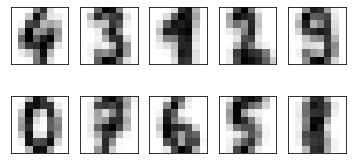

In [185]:
clustercenters = kmeansdigits_predef_clusters.cluster_centers_.reshape(10,8,8)
fig,axs = plt.subplots(2,5,figsize = (6,3))

axs = axs.flatten()

for ind,axis in zip(range(10),axs):
  axis.imshow(clustercenters[ind],interpolation='nearest',cmap=plt.cm.binary)
  axis.set(xticks = [],yticks = [])
  

Kmeans is able to identify most of the digits well, except for digit 8. 

We now look at the clustering accuracy. 

##### Get cluster accuracy

In [186]:
digitslabels = np.zeros_like(y_digits)
digitsclusters = kmeansdigits_predef_clusters.predict(X_digits_scaled)

In [187]:
y_digits.shape

(1797,)

In [188]:
for ind in range(10):
  digitslabels[digitsclusters == ind] = mode(y_digits[digitsclusters == ind])

In [189]:
print(confusion_matrix(y_digits,digitslabels))

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   1 155   0   2   0   7   7  11]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   6   3   4   0   4   2   5 102  48]
 [  0  20   0   6   0   6   0   7   2 139]]


* Always good to check xaxis and yaxis mapping with actual and predicted values

In [190]:
sum(y_digits == 0)

178

* Thus y axis = true labels. We transpose the matrix to get x axis as true labels

Text(0.5, 1.0, 'Kmeans on digits dataset')

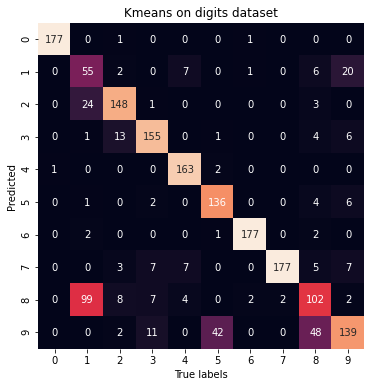

In [191]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_digits,digitslabels).T,
            square = True,
            fmt = 'd',
            cbar = False,
            annot = True
            )
plt.xlabel('True labels')
plt.ylabel('Predicted')
plt.title('Kmeans on digits dataset')

* As seen from the cluster center images: 
  * Digit 1 is sometimes predicted as 8 (surprising) and 2. 
  * 5 and 8 as 9 and 
  * 9 as 1 sometimes
  

In [192]:
print("Accuracy of kmeans clustering on digits = {:.2f}".format(accuracy_score(y_digits,digitslabels
                     )))

Accuracy of kmeans clustering on digits = 0.80


The accuracy is decent ~80%. 

In [193]:
print("ARI Score of kmeans clustering on digits = {:.2f}".format(adjusted_rand_score(y_digits,digitslabels
                     )))

ARI Score of kmeans clustering on digits = 0.67


#### (Optional) t-SNE -> kMeans

We try kmeans after t-SNE transformation on  the data. 

t-SNE is good at preserving points within clusters

In [194]:
from sklearn.manifold import TSNE

In [195]:
tsne = TSNE(random_state=0)

In [196]:
digits_tsne = tsne.fit_transform(X_digits_scaled)

In [197]:
kmeansdigits_tsne = KMeans(n_clusters=10,random_state=0)

In [198]:
kmeansdigits_tsne.fit(digits_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

##### Get clustering accuracy

In [199]:
labels_tsnedigits = np.zeros_like(y_digits)

In [200]:
tsne_digits_pred = kmeansdigits_tsne.predict(digits_tsne)

In [201]:
# tsne_digits_pred

In [202]:
for ind in range(10):
  labels_tsnedigits[tsne_digits_pred == ind] = mode(y_digits[tsne_digits_pred == ind])

Text(47.040000000000006, 0.5, 'Predicted')

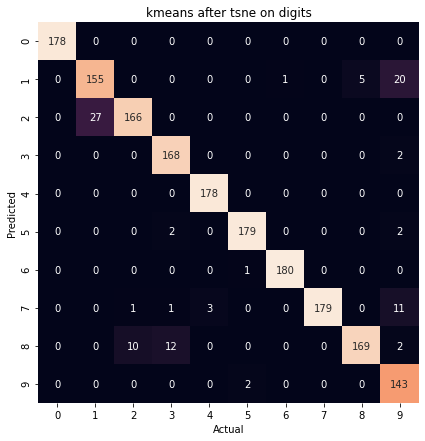

In [203]:
plt.figure(figsize = (7,7))
sns.heatmap(confusion_matrix(y_digits,
                 labels_tsnedigits).T,
            square = True,
            cbar = False,
            annot = True,
            fmt = 'd')

plt.title('kmeans after tsne on digits')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [204]:
sum(y_digits == 2) #checking which axis in predicted data and which is actual

177

In [205]:
print("Accuracy score on digits after tsne = {:.2f}".format(accuracy_score(y_digits,
                                                                           labels_tsnedigits)))

Accuracy score on digits after tsne = 0.94


* Whooping 94% without training labels!


## References & further reading:

References:
1. Applied Data Science in Python Course - Coursera
2. Python data science handbook: K-means clustering https://jakevdp.github.io//PythonDataScienceHandbook/05.11-k-means.html


Further reading:
1. [Clustering Evaluation](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html): https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html

2. Further example of kmeans on color compression in images: https://jakevdp.github.io//PythonDataScienceHandbook/05.11-k-means.html


